mount drive at folder for project

In [1]:
# mount it
from google.colab import drive
drive.mount('/content/gdrive')
# copy it there

Mounted at /content/gdrive


My google drive path for this project




In [6]:
path = '/content/gdrive/MyDrive/side_proj'

libraries



In [3]:
import pandas as pd


In [7]:
df = pd.read_csv(path+'/films.csv')
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,2h 22m,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/
1,1,The Godfather,9.2,Francis Ford Coppola,1972,2h 55m,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/
2,2,The Dark Knight,9.0,Christopher Nolan,2008,2h 32m,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,3h 22m,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/
4,4,12 Angry Men,9.0,Sidney Lumet,1957,1h 36m,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/


so we have our top 250 films and a folder for poster images, now we want to see what we can find with mobilenet


@software{yolov5,
  title = {YOLOv5 by Ultralytics},
  author = {Glenn Jocher},
  year = {2020},
  version = {7.0},
  license = {AGPL-3.0},
  url = {https://github.com/ultralytics/yolov5},
  doi = {10.5281/zenodo.3908559},
  orcid = {0000-0001-5950-6979}
}


In [ ]:
import torch


# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-5 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
filename = path+"/images/TheShawshankRedemption.jpg"

image 1/1: 281x190 (no detections)
Speed: 11.4ms pre-process, 309.1ms inference, 1.1ms NMS per image at shape (1, 3, 640, 448)


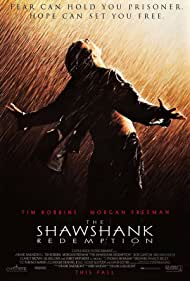

In [ ]:
imgs = filename # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.show()  # or .show()

In [ ]:
rs = results.pandas().xyxy[0]
counts = rs['name'].value_counts()

In [ ]:
counts['person']

1

image 1/1: 281x190 5 persons, 2 ties
Speed: 9.9ms pre-process, 288.8ms inference, 1.2ms NMS per image at shape (1, 3, 640, 448)


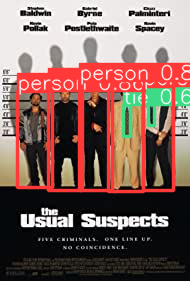

In [ ]:
imgs = path+"/images/TheUsualSuspects.jpg" # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.show()  # or .show()

image 1/1: 281x190 1 motorcycle
Speed: 12.3ms pre-process, 303.7ms inference, 1.3ms NMS per image at shape (1, 3, 640, 448)


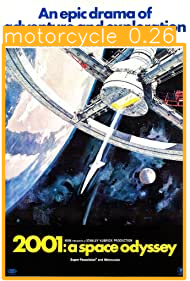

In [ ]:
imgs = path+"/images/2001ASpaceOdyssey.jpg" # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.show()  # or .show()

In [ ]:
print(model.model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

Lets use the object counter to get count of some key objects and then add this information to the dataframe


In [ ]:
count_people =[]
for i in df['image link']:
    # path
    image = path+'/'+i
    # image paths have \\ that needs to be /
    image = image.replace("\\", "/")
    #run model
    results = model(image)
    #get results of object counts
    res = results.pandas().xyxy[0]
    #we only want value counts
    counts = res['name'].value_counts()
    #we only want people counts
    try:
      people = counts['person']
    except:
      people = 0
    count_people.append(people)
print(count_people)

[0, 1, 1, 1, 2, 7, 4, 2, 4, 5, 1, 2, 6, 6, 1, 4, 2, 1, 0, 1, 1, 0, 2, 15, 1, 3, 1, 1, 1, 1, 1, 0, 2, 4, 2, 1, 0, 1, 0, 0, 1, 5, 6, 1, 0, 2, 0, 3, 1, 3, 0, 3, 0, 1, 3, 3, 1, 8, 2, 1, 0, 2, 3, 4, 1, 0, 0, 0, 1, 4, 2, 0, 0, 1, 1, 1, 0, 6, 2, 2, 6, 2, 3, 3, 1, 2, 3, 3, 6, 0, 3, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 5, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 5, 3, 2, 2, 1, 2, 5, 4, 0, 1, 2, 2, 1, 7, 2, 0, 4, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 6, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 5, 0, 0, 4, 1, 5, 3, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 2, 1, 2, 3, 0, 1, 9, 2, 0, 4, 2, 0, 1, 0, 1, 1, 2, 4, 1, 5, 2, 0, 6, 0, 5, 1, 0, 1, 1, 2, 3, 2, 5, 1, 1, 1, 0, 0, 2, 6, 3, 2, 1, 6, 0, 5, 1, 3, 2, 0, 8, 1, 1, 2, 0, 0, 4, 0, 0]


Lets merge the object counter results into the dataframe

In [ ]:
df['YOLOv5_count_people'] = count_people

In [ ]:
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage,YOLOv5_count_people
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,2h 22m,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/,0
1,1,The Godfather,9.2,Francis Ford Coppola,1972,2h 55m,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/,1
2,2,The Dark Knight,9.0,Christopher Nolan,2008,2h 32m,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/,1
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,3h 22m,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/,1
4,4,12 Angry Men,9.0,Sidney Lumet,1957,1h 36m,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/,2


In [ ]:
# lets save this new data so we can load it back later without all the processing
df.to_csv(path+'/films_YOLO.csv', index=False)

In [ ]:
df = pd.read_csv(path+'/films_YOLO.csv')

<Axes: xlabel='year', ylabel='YOLOv5_count_people'>

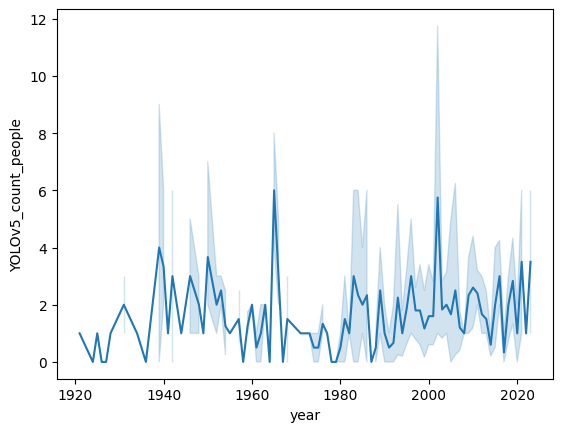

In [ ]:
#lets see if the number of people in the poster changes with any of the other vars --- also, is it a predictor of rating (may be hard to work this out if we are only looking at TOP 250)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.lineplot(data=df, x="year", y="YOLOv5_count_people")

<ipython-input-11-01617abca165>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby((df['year']//10)*10).mean(), x='year', y="YOLOv5_count_people")


([<matplotlib.axis.XTick at 0x7fbf30d82bf0>,
 [Text(1925.0, 0, '1925'),
  Text(1945.0, 0, '1945'),
  Text(1965.0, 0, '1965'),
  Text(1985.0, 0, '1985'),
  Text(2005.0, 0, '2005'),
  Text(2025.0, 0, '2025'),
  Text(2045.0, 0, '2045')])

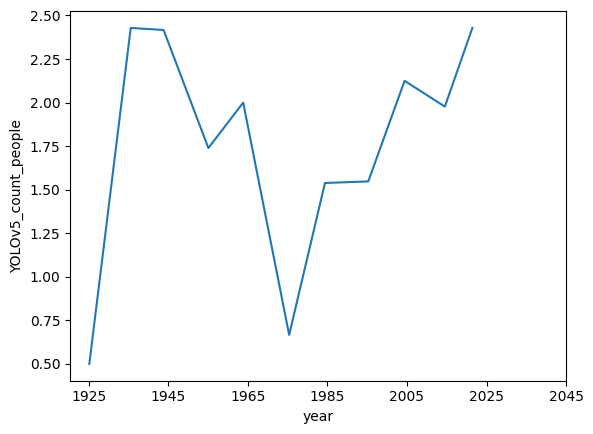

In [ ]:
# we have a small set of data, lets bin by decade and get average number of people counted
sns.lineplot(data=df.groupby((df['year']//10)*10).mean(), x='year', y="YOLOv5_count_people")

# moved the ticks up to the middle of each range they represent
ticks = plt.gca().get_xticks()
ticks += 5
plt.xticks(ticks)

In [ ]:
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage,YOLOv5_count_people
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,2h 22m,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/,0
1,1,The Godfather,9.2,Francis Ford Coppola,1972,2h 55m,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/,1
2,2,The Dark Knight,9.0,Christopher Nolan,2008,2h 32m,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/,1
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,3h 22m,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/,1
4,4,12 Angry Men,9.0,Sidney Lumet,1957,1h 36m,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/,2
